## Máster en Big Data y Data Science

### Metodologías de gestión y diseño de proyectos de big data

#### AP2 - Extracción de reglas de pertenencia a grupos

##### Árboles de Decisión

---

En esta libreta se toman los resultados de la clusterización para realizar la extracción de reglas que permitan comprender de qué manera fueron conformados los grupos. 

---

### Carga de librerias a utilizar

In [1]:
# Se importan las librerias a utilizar
import pandas as pd
import numpy as np

# Para registro de toda la experimentación
import mlflow

# Para la generación de los sets de train - test
from sklearn.model_selection import train_test_split

#Importaciones varias para la evaluación
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Lectura del dataset Kmeans = 2

In [5]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../../../data/final/resultados_kmeans_k2.csv', sep=';')
datos.head(10)

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO,cluster
0,24,11000,3,5.0,64800,0.17,5.79,0,36.0,15149.0,...,False,True,False,False,False,False,True,False,False,0
1,24,1500,2,0.0,30996,0.05,15.99,1,45.0,992.0,...,True,False,True,True,False,False,False,False,False,0
2,23,10000,2,7.0,40104,0.25,12.72,0,38.0,1447.0,...,True,False,True,False,True,False,False,False,False,0
3,25,6000,4,2.0,23198,0.26,8.00,0,24.0,3940.0,...,False,True,False,False,False,False,False,False,True,0
4,26,10000,2,0.0,50000,0.20,7.74,0,41.0,4369.0,...,False,True,False,False,False,False,False,False,True,0
5,25,22000,2,0.0,58000,0.38,14.65,1,34.0,1448.0,...,False,False,True,True,False,False,False,False,False,0
6,22,18500,4,2.0,38000,0.49,7.66,1,19.0,1598.0,...,False,True,False,False,False,False,False,True,False,0
7,24,1500,2,1.0,50000,0.03,14.26,0,36.0,2732.0,...,False,True,False,False,False,False,True,False,False,0
8,25,12375,4,1.0,47700,0.26,7.90,0,36.0,4943.0,...,False,True,False,False,False,False,False,False,True,0
9,22,8075,3,4.0,54000,0.15,13.06,0,45.0,15798.0,...,False,False,True,False,False,False,True,False,False,0


### Armado de los sets de entrenamiento y testeo

In [6]:
# Se separan los atributos de datos de los de la etiqueta del dataset

labels = datos.cluster.values
labels = labels.astype('str') # Modificación para asignar el valor

features = datos[['edad', 'importe_solicitado', 'duracion_credito',
       'antiguedad_empleado', 'ingresos', 'pct_ingreso', 'tasa_interes',
       'estado_credito', 'antiguedad_cliente', 'gastos_ult_12m',
       'limite_credito_tc', 'operaciones_ult_12m', 'personas_a_cargo',
       'situacion_vivienda_ALQUILER', 'situacion_vivienda_HIPOTECA',
       'situacion_vivienda_OTROS', 'situacion_vivienda_PROPIA',
       'objetivo_credito_EDUCACIÓN', 'objetivo_credito_INVERSIONES',
       'objetivo_credito_MEJORAS_HOGAR', 'objetivo_credito_PAGO_DEUDAS',
       'objetivo_credito_PERSONAL', 'objetivo_credito_SALUD', 'falta_pago_N',
       'falta_pago_Y', 'estado_civil_CASADO',
       'estado_civil_DESCONOCIDO', 'estado_civil_DIVORCIADO',
       'estado_civil_SOLTERO', 'estado_cliente_ACTIVO',
       'estado_cliente_PASIVO', 'genero_F', 'genero_M',
       'nivel_educativo_DESCONOCIDO', 'nivel_educativo_POSGRADO_COMPLETO',
       'nivel_educativo_POSGRADO_INCOMPLETO',
       'nivel_educativo_SECUNDARIO_COMPLETO',
       'nivel_educativo_UNIVERSITARIO_COMPLETO',
       'nivel_educativo_UNIVERSITARIO_INCOMPLETO']]

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['0' '0' '0' '0' '0' '0' '0' '0' '0' '0']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,24,11000,3,5.0,64800,0.17,5.79,0,36.0,15149.0,...,True,False,True,False,False,False,False,True,False,False
1,24,1500,2,0.0,30996,0.05,15.99,1,45.0,992.0,...,False,True,False,True,True,False,False,False,False,False
2,23,10000,2,7.0,40104,0.25,12.72,0,38.0,1447.0,...,False,True,False,True,False,True,False,False,False,False
3,25,6000,4,2.0,23198,0.26,8.00,0,24.0,3940.0,...,True,False,True,False,False,False,False,False,False,True
4,26,10000,2,0.0,50000,0.20,7.74,0,41.0,4369.0,...,True,False,True,False,False,False,False,False,False,True


In [7]:
# Se pasa a binarizar los atributos

data = pd.get_dummies(features)
data.head()

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,24,11000,3,5.0,64800,0.17,5.79,0,36.0,15149.0,...,True,False,True,False,False,False,False,True,False,False
1,24,1500,2,0.0,30996,0.05,15.99,1,45.0,992.0,...,False,True,False,True,True,False,False,False,False,False
2,23,10000,2,7.0,40104,0.25,12.72,0,38.0,1447.0,...,False,True,False,True,False,True,False,False,False,False
3,25,6000,4,2.0,23198,0.26,8.00,0,24.0,3940.0,...,True,False,True,False,False,False,False,False,False,True
4,26,10000,2,0.0,50000,0.20,7.74,0,41.0,4369.0,...,True,False,True,False,False,False,False,False,False,True


In [8]:
# Para evitar problemas con mlfow se hace una conversión de integer a double 
# de los atributos: 'importe_solicitado', 'duracion_credito', 'estado_credito'

# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns

# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')

In [9]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 

# Toma por defecto 75% (entrenamiento) - 25% (testeo)

# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de entrenamiento: 
edad                                           25.0
importe_solicitado                          10375.0
duracion_credito                                4.0
antiguedad_empleado                             3.0
ingresos                                    35280.0
pct_ingreso                                    0.29
tasa_interes                                  14.27
estado_credito                                  1.0
antiguedad_cliente                             33.0
gastos_ult_12m                               3885.0
limite_credito_tc                            3855.0
operaciones_ult_12m                            83.0
personas_a_cargo                                2.0
situacion_vivienda_ALQUILER                    True
situacion_vivienda_HIPOTECA                   False
situacion_vivienda_OTROS                      False
situacion_vivienda_PROPIA                     False
objetivo_credito_EDUCACIÓN                    False
objetivo_credito_INVERSIONES     

In [10]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=modelo.classes_)
    disp.plot()
    plt.show()
    plt.close()

In [11]:
# Para obtener todos los parámetros y no solo los modificados

from sklearn import set_config

set_config(print_changed_only=False)

### Generación de modelos

Se pasa a configurar la serie de experimentos en **mlflow**

In [12]:
# Se establece un nombre para identificar la serie de experimentos

mlflow.set_experiment(experiment_name="Reglas - Prueba #1 - Kmeans K=2")
mlflow.autolog()

2024/05/07 19:50:08 INFO mlflow.tracking.fluent: Experiment with name 'Reglas - Prueba #1 - Kmeans K=2' does not exist. Creating a new experiment.
2024/05/07 19:50:10 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


#### Árboles de Decisión (TDIDT)

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=3, 
                                 criterion='entropy', 
                                 min_samples_split=10)

    dtc.fit(train_data, train_labels)

    # Se finaliza el registro
    mlflow.end_run()

2024/05/07 19:51:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Paula Domski\Documents\Master_BigData\MetodologiaGestionProyectos\SesionPractica1\13MBID-OCT2324\.venv\lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


In [14]:
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

2024/05/07 19:52:00 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Paula Domski\Documents\Master_BigData\MetodologiaGestionProyectos\SesionPractica1\13MBID-OCT2324\.venv\lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


Rendimiento obtenido: 0.9995495495495496
Reporte de indicadores:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2083
           1       0.99      1.00      1.00       137

    accuracy                           1.00      2220
   macro avg       1.00      1.00      1.00      2220
weighted avg       1.00      1.00      1.00      2220

Matriz de confusión:


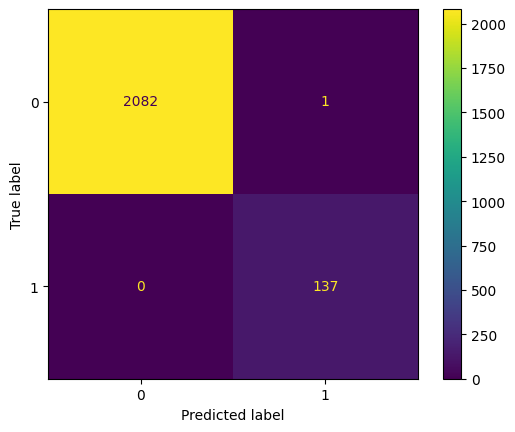

In [15]:
evaluar_modelo(dtc, test_data, test_labels)

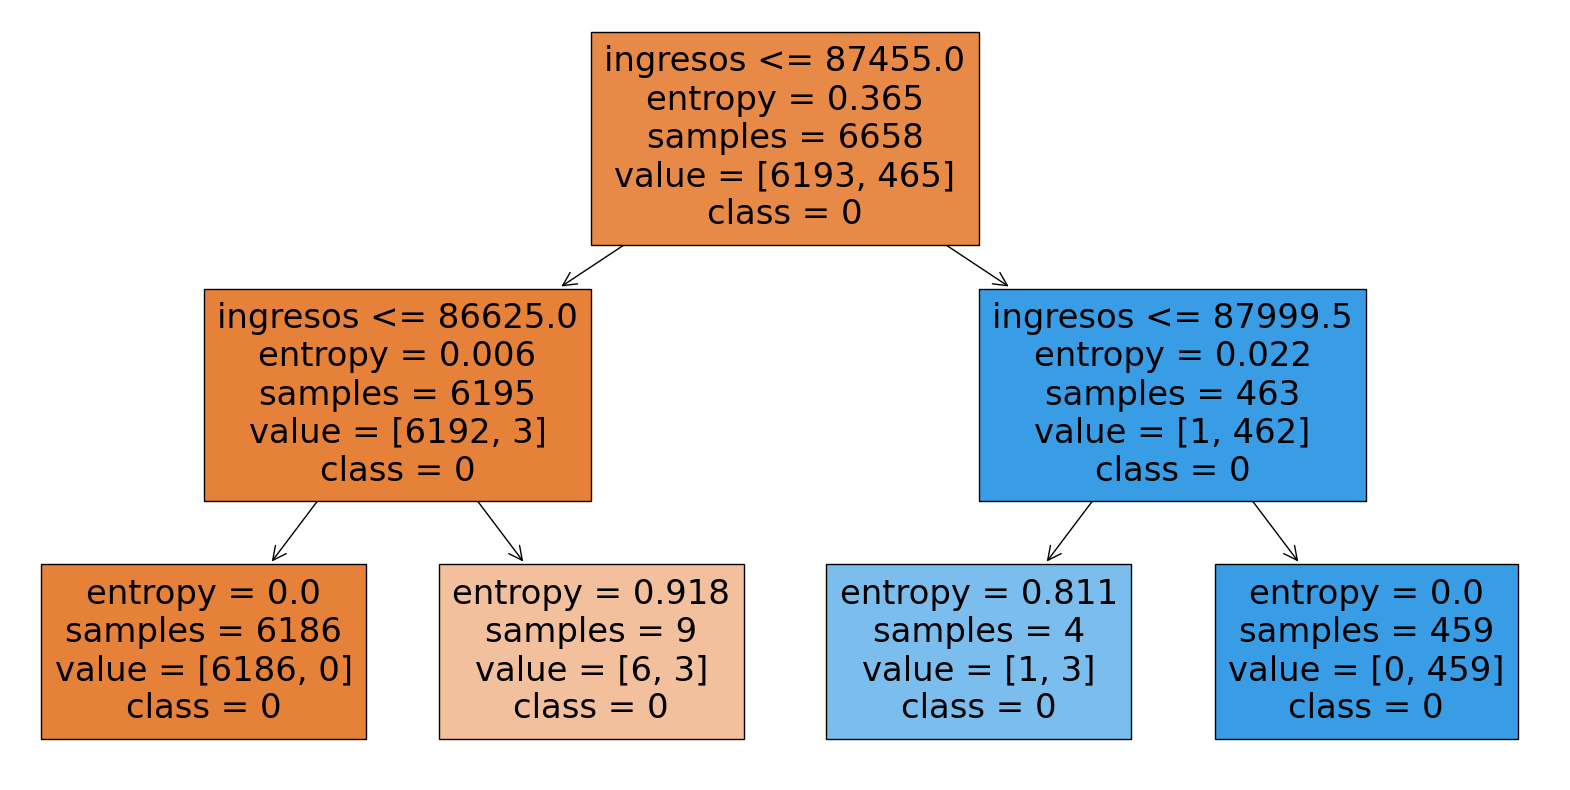

In [16]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()

### Lectura del dataset Kmeans = 3

In [17]:
# Se hace la lectura del dataset del seminario y se obtiene su cabecera
datos = pd.read_csv('../../../data/final/resultados_kmeans_k3.csv', sep=';')
datos.head(10)

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO,cluster
0,24,11000,3,5.0,64800,0.17,5.79,0,36.0,15149.0,...,False,True,False,False,False,False,True,False,False,1
1,24,1500,2,0.0,30996,0.05,15.99,1,45.0,992.0,...,True,False,True,True,False,False,False,False,False,2
2,23,10000,2,7.0,40104,0.25,12.72,0,38.0,1447.0,...,True,False,True,False,True,False,False,False,False,2
3,25,6000,4,2.0,23198,0.26,8.00,0,24.0,3940.0,...,False,True,False,False,False,False,False,False,True,2
4,26,10000,2,0.0,50000,0.20,7.74,0,41.0,4369.0,...,False,True,False,False,False,False,False,False,True,1
5,25,22000,2,0.0,58000,0.38,14.65,1,34.0,1448.0,...,False,False,True,True,False,False,False,False,False,1
6,22,18500,4,2.0,38000,0.49,7.66,1,19.0,1598.0,...,False,True,False,False,False,False,False,True,False,2
7,24,1500,2,1.0,50000,0.03,14.26,0,36.0,2732.0,...,False,True,False,False,False,False,True,False,False,1
8,25,12375,4,1.0,47700,0.26,7.90,0,36.0,4943.0,...,False,True,False,False,False,False,False,False,True,2
9,22,8075,3,4.0,54000,0.15,13.06,0,45.0,15798.0,...,False,False,True,False,False,False,True,False,False,1


In [18]:
# Se separan los atributos de datos de los de la etiqueta del dataset

labels = datos.cluster.values
labels = labels.astype('str') # Modificación para asignar el valor

features = datos[['edad', 'importe_solicitado', 'duracion_credito',
       'antiguedad_empleado', 'ingresos', 'pct_ingreso', 'tasa_interes',
       'estado_credito', 'antiguedad_cliente', 'gastos_ult_12m',
       'limite_credito_tc', 'operaciones_ult_12m', 'personas_a_cargo',
       'situacion_vivienda_ALQUILER', 'situacion_vivienda_HIPOTECA',
       'situacion_vivienda_OTROS', 'situacion_vivienda_PROPIA',
       'objetivo_credito_EDUCACIÓN', 'objetivo_credito_INVERSIONES',
       'objetivo_credito_MEJORAS_HOGAR', 'objetivo_credito_PAGO_DEUDAS',
       'objetivo_credito_PERSONAL', 'objetivo_credito_SALUD', 'falta_pago_N',
       'falta_pago_Y', 'estado_civil_CASADO',
       'estado_civil_DESCONOCIDO', 'estado_civil_DIVORCIADO',
       'estado_civil_SOLTERO', 'estado_cliente_ACTIVO',
       'estado_cliente_PASIVO', 'genero_F', 'genero_M',
       'nivel_educativo_DESCONOCIDO', 'nivel_educativo_POSGRADO_COMPLETO',
       'nivel_educativo_POSGRADO_INCOMPLETO',
       'nivel_educativo_SECUNDARIO_COMPLETO',
       'nivel_educativo_UNIVERSITARIO_COMPLETO',
       'nivel_educativo_UNIVERSITARIO_INCOMPLETO']]

print(f"Vista de los datos del atributo target: \n{labels[:10]}")
print("-"*50)
print("Vista parcial de los datos sin el atributo target:")
features.head()

Vista de los datos del atributo target: 
['1' '2' '2' '2' '1' '1' '2' '1' '2' '1']
--------------------------------------------------
Vista parcial de los datos sin el atributo target:


,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,24,11000,3,5.0,64800,0.17,5.79,0,36.0,15149.0,...,True,False,True,False,False,False,False,True,False,False
1,24,1500,2,0.0,30996,0.05,15.99,1,45.0,992.0,...,False,True,False,True,True,False,False,False,False,False
2,23,10000,2,7.0,40104,0.25,12.72,0,38.0,1447.0,...,False,True,False,True,False,True,False,False,False,False
3,25,6000,4,2.0,23198,0.26,8.00,0,24.0,3940.0,...,True,False,True,False,False,False,False,False,False,True
4,26,10000,2,0.0,50000,0.20,7.74,0,41.0,4369.0,...,True,False,True,False,False,False,False,False,False,True


In [19]:
# Se pasa a binarizar los atributos

data = pd.get_dummies(features)
data.head()

,edad,importe_solicitado,duracion_credito,antiguedad_empleado,ingresos,pct_ingreso,tasa_interes,estado_credito,antiguedad_cliente,gastos_ult_12m,...,estado_cliente_ACTIVO,estado_cliente_PASIVO,genero_F,genero_M,nivel_educativo_DESCONOCIDO,nivel_educativo_POSGRADO_COMPLETO,nivel_educativo_POSGRADO_INCOMPLETO,nivel_educativo_SECUNDARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_COMPLETO,nivel_educativo_UNIVERSITARIO_INCOMPLETO
0,24,11000,3,5.0,64800,0.17,5.79,0,36.0,15149.0,...,True,False,True,False,False,False,False,True,False,False
1,24,1500,2,0.0,30996,0.05,15.99,1,45.0,992.0,...,False,True,False,True,True,False,False,False,False,False
2,23,10000,2,7.0,40104,0.25,12.72,0,38.0,1447.0,...,False,True,False,True,False,True,False,False,False,False
3,25,6000,4,2.0,23198,0.26,8.00,0,24.0,3940.0,...,True,False,True,False,False,False,False,False,False,True
4,26,10000,2,0.0,50000,0.20,7.74,0,41.0,4369.0,...,True,False,True,False,False,False,False,False,False,True


In [20]:
# Para evitar problemas con mlfow se hace una conversión de integer a double 
# de los atributos: 'importe_solicitado', 'duracion_credito', 'estado_credito'

# Se filtran las columnas del tipo integer
integer_columns = data.select_dtypes(include='int').columns

# Convert integer columns to double
data[integer_columns] = data[integer_columns].astype('float')

In [22]:
# Se reparten los datos disponibles en conjuntos para entrenamiento y testeo

train_data, test_data, train_labels, test_labels = train_test_split(data, labels) 

# Toma por defecto 75% (entrenamiento) - 25% (testeo)

# Vista de los datos de entrenamiento para una fila

print(f"Un registro de entrenamiento: \n{train_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{train_labels[1]}\n")

print("#"*50)
print("#"*50)

# Vista de los datos de testeo para una fila

print(f"\nUn registro de testeo: \n{test_data.iloc[1]}")
print("-"*50)
print(f"Label del registro: \n{test_labels[1]}")

Un registro de entrenamiento: 
edad                                           22.0
importe_solicitado                           6600.0
duracion_credito                                3.0
antiguedad_empleado                             5.0
ingresos                                    64000.0
pct_ingreso                                     0.1
tasa_interes                                    8.9
estado_credito                                  0.0
antiguedad_cliente                             38.0
gastos_ult_12m                               4178.0
limite_credito_tc                            4269.0
operaciones_ult_12m                            75.0
personas_a_cargo                                3.0
situacion_vivienda_ALQUILER                    True
situacion_vivienda_HIPOTECA                   False
situacion_vivienda_OTROS                      False
situacion_vivienda_PROPIA                     False
objetivo_credito_EDUCACIÓN                    False
objetivo_credito_INVERSIONES     

In [23]:
# Configuración de la evaluación

def evaluar_modelo(modelo, test_data, test_labels):
    prediction = modelo.predict(test_data)
    print('Rendimiento obtenido:',accuracy_score(test_labels,prediction))
    print('Reporte de indicadores:\n',classification_report(test_labels,prediction))
    print('Matriz de confusión:')
    cm = confusion_matrix(test_labels, prediction, labels=modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                   display_labels=modelo.classes_)
    disp.plot()
    plt.show()
    plt.close()

In [ ]:
# Para obtener todos los parámetros y no solo los modificados

from sklearn import set_config

set_config(print_changed_only=False)

In [24]:
# Se establece un nombre para identificar la serie de experimentos

mlflow.set_experiment(experiment_name="Reglas - Prueba #2 - Kmeans K=3")
mlflow.autolog()

2024/05/07 22:50:12 INFO mlflow.tracking.fluent: Experiment with name 'Reglas - Prueba #2 - Kmeans K=3' does not exist. Creating a new experiment.
2024/05/07 22:50:12 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=3, 
                                 criterion='entropy', 
                                 min_samples_split=10)

    dtc.fit(train_data, train_labels)

    # Se finaliza el registro
    mlflow.end_run()

2024/05/07 22:50:50 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Paula Domski\Documents\Master_BigData\MetodologiaGestionProyectos\SesionPractica1\13MBID-OCT2324\.venv\lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


In [26]:
dtc


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

2024/05/07 22:51:08 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Paula Domski\Documents\Master_BigData\MetodologiaGestionProyectos\SesionPractica1\13MBID-OCT2324\.venv\lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


Rendimiento obtenido: 0.990990990990991
Reporte de indicadores:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.98      0.99      0.99       988
           2       1.00      0.99      0.99      1172

    accuracy                           0.99      2220
   macro avg       0.99      0.99      0.99      2220
weighted avg       0.99      0.99      0.99      2220

Matriz de confusión:


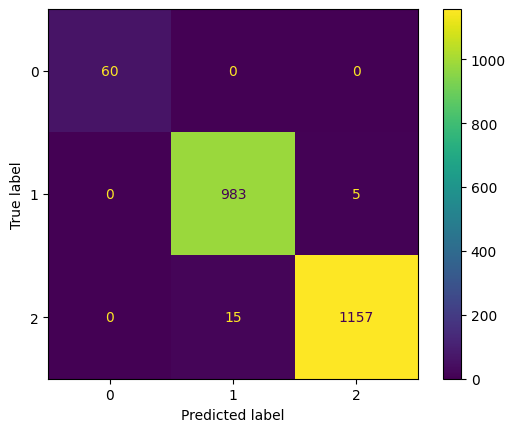

In [27]:
evaluar_modelo(dtc, test_data, test_labels)

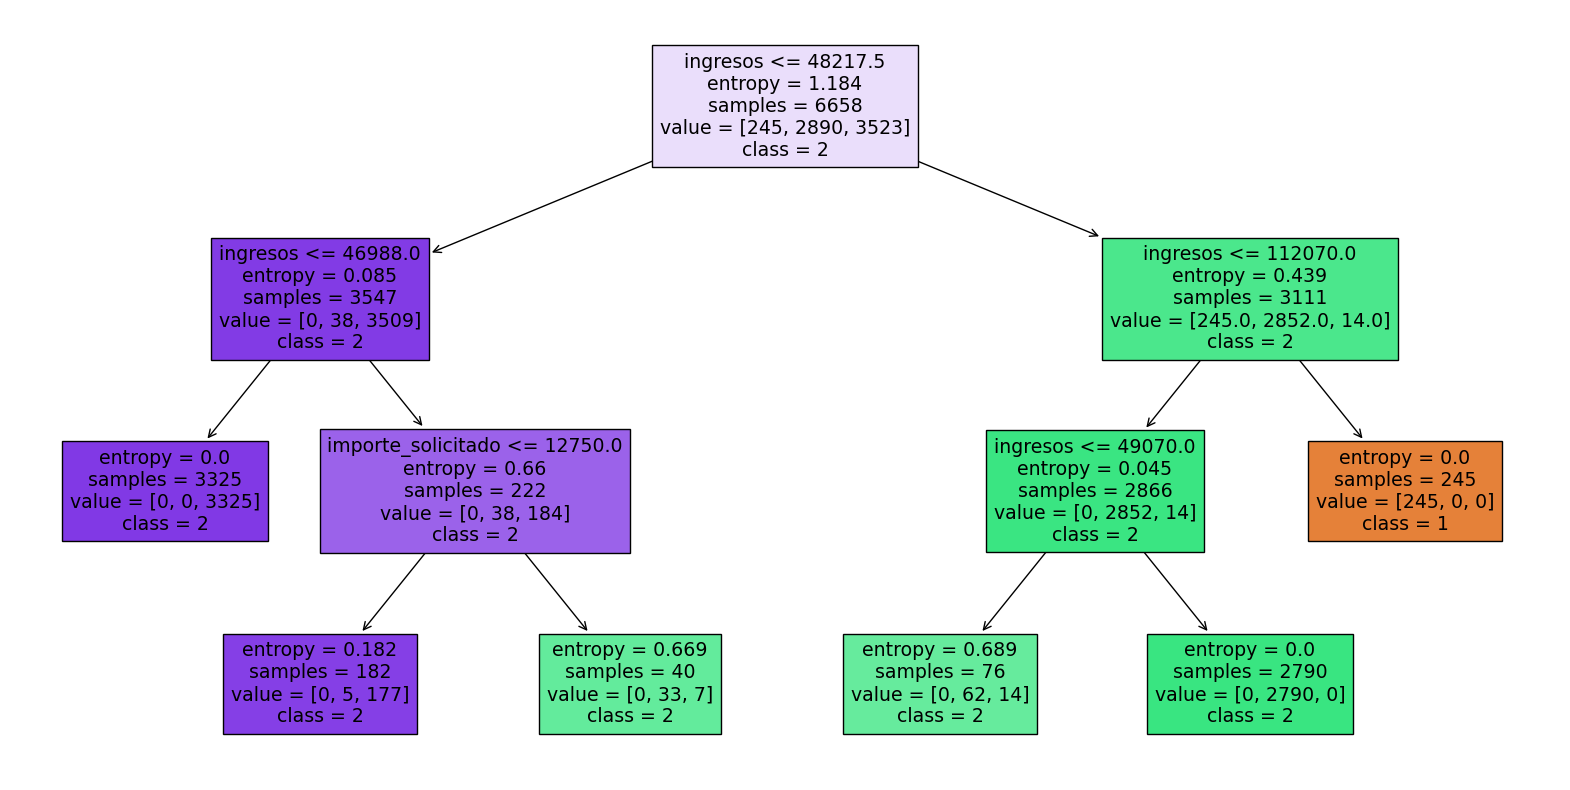

In [28]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()

### Lectura del dataset Kmeans = 3 . Prueba 2

In [29]:
# Se establece un nombre para identificar la serie de experimentos

mlflow.set_experiment(experiment_name="Reglas - Prueba #3 - Kmeans K=3")
mlflow.autolog()

2024/05/07 23:25:19 INFO mlflow.tracking.fluent: Experiment with name 'Reglas - Prueba #3 - Kmeans K=3' does not exist. Creating a new experiment.
2024/05/07 23:25:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

with mlflow.start_run(run_name='Decision Tree'):
    dtc = DecisionTreeClassifier(max_depth=5, 
                                 criterion='gini', 
                                 min_samples_split=20)

    dtc.fit(train_data, train_labels)

    # Se finaliza el registro
    mlflow.end_run()

2024/05/07 23:25:21 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Paula Domski\Documents\Master_BigData\MetodologiaGestionProyectos\SesionPractica1\13MBID-OCT2324\.venv\lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


In [31]:
dtc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=20, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=None, splitter='best')

2024/05/07 23:26:32 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\Paula Domski\Documents\Master_BigData\MetodologiaGestionProyectos\SesionPractica1\13MBID-OCT2324\.venv\lib\site-packages\mlflow\data\digest_utils.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead."


Rendimiento obtenido: 0.9945945945945946
Reporte de indicadores:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       0.99      1.00      0.99       988
           2       1.00      0.99      0.99      1172

    accuracy                           0.99      2220
   macro avg       1.00      1.00      1.00      2220
weighted avg       0.99      0.99      0.99      2220

Matriz de confusión:


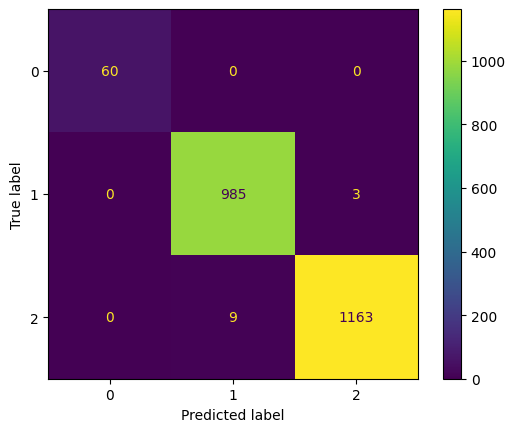

In [32]:
evaluar_modelo(dtc, test_data, test_labels)

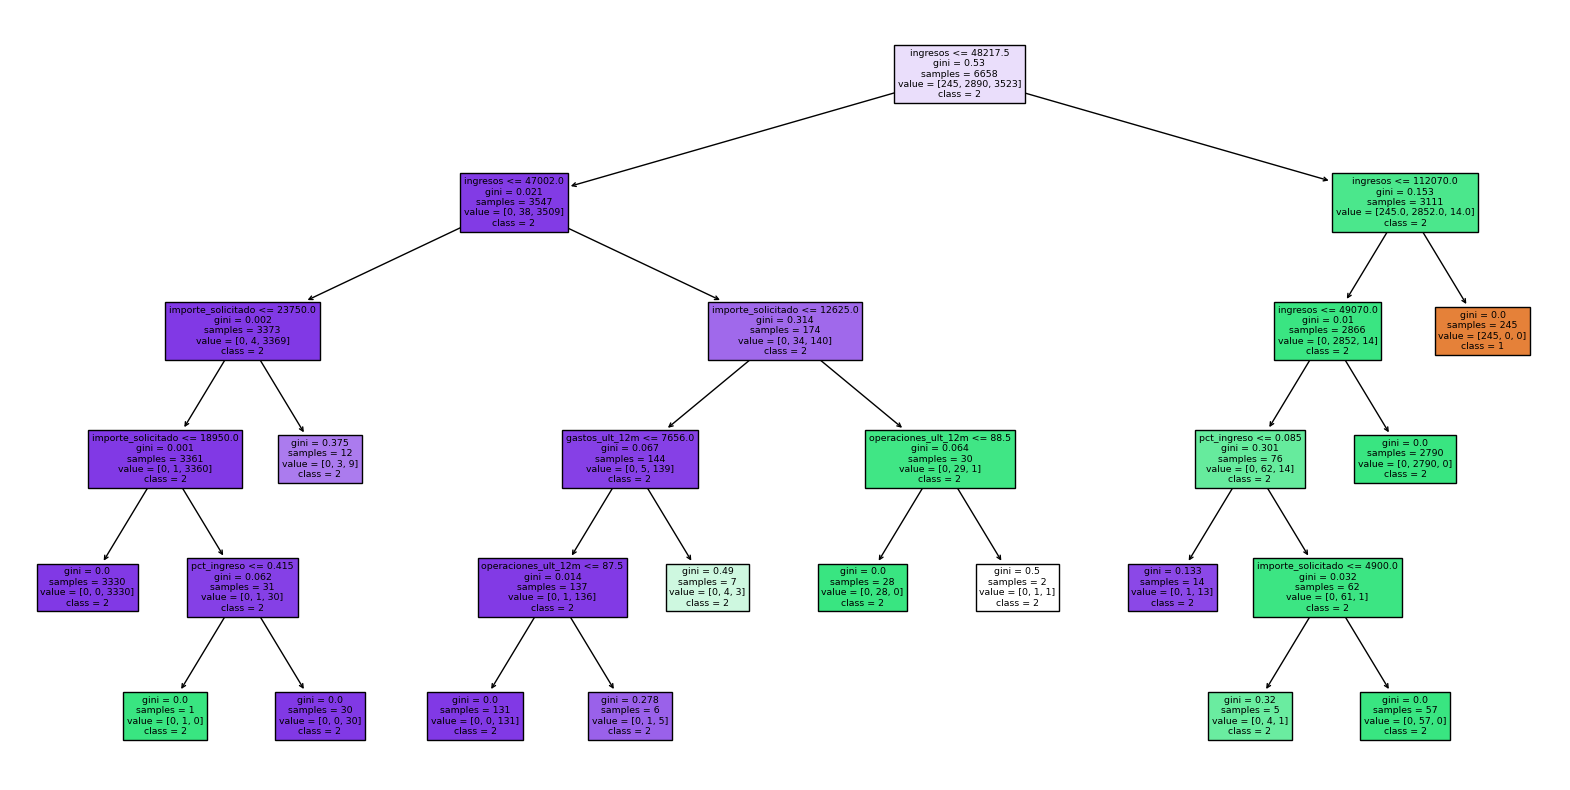

In [33]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True, feature_names=data.columns, class_names=labels)
plt.show()
plt.close()